In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [23]:
file_path = Path('../week9_stats/week11_stats.csv')
qb_df = pd.read_csv(file_path)
qb_df.head()

,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,DKPt,OvRank
0,2,2,4,1,0,230,1010,4.39,10,23,...,199,11.06,0,1,0,10,NaN,NaN,209.1,1
1,0,0,0,0,0,160,904,5.65,11,19,...,88,6.77,0,1,1,11,1.0,NaN,182.2,2
2,245,366,2936,25,7,34,215,6.32,1,0,...,0,NaN,0,3,0,1,1.0,1.0,247.9,3
3,220,341,2733,20,10,68,476,7.00,4,0,...,0,NaN,0,8,3,4,NaN,NaN,253.9,4
4,0,0,0,0,0,2,5,2.50,0,84,...,740,11.75,8,0,0,8,1.0,NaN,190.5,5


In [24]:
qb_df.fillna(0)

,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,...,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,DKPt,OvRank
0,2,2,4,1,0,230,1010,4.39,10,23,...,199,11.06,0,1,0,10,0.0,0.0,209.1,1
1,0,0,0,0,0,160,904,5.65,11,19,...,88,6.77,0,1,1,11,1.0,0.0,182.2,2
2,245,366,2936,25,7,34,215,6.32,1,0,...,0,0.00,0,3,0,1,1.0,1.0,247.9,3
3,220,341,2733,20,10,68,476,7.00,4,0,...,0,0.00,0,8,3,4,0.0,0.0,253.9,4
4,0,0,0,0,0,2,5,2.50,0,84,...,740,11.75,8,0,0,8,1.0,0.0,190.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0,0,0,0,0,0,0,0.00,0,2,...,0,0.00,0,0,0,0,0.0,0.0,0.0,555
555,0,0,0,0,0,0,0,0.00,0,0,...,0,0.00,0,0,0,0,0.0,0.0,0.0,556
556,0,0,0,0,0,0,0,0.00,0,2,...,13,6.50,0,1,1,0,0.0,0.0,2.3,557
557,0,0,0,0,0,1,-1,-1.00,0,4,...,15,15.00,0,1,1,0,0.0,0.0,1.4,558


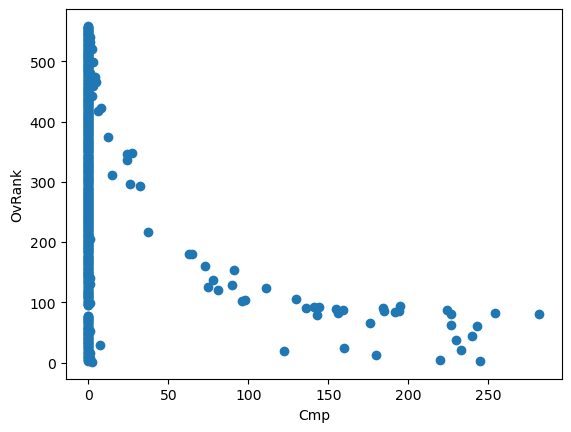

In [26]:
plt.scatter(qb_df.Cmp, qb_df.OvRank)
plt.xlabel('Cmp')
plt.ylabel('OvRank')
plt.show()

In [27]:
X = qb_df.Cmp.values.reshape(-1, 1)

In [28]:
X[:5]

array([[  2],
       [  0],
       [245],
       [220],
       [  0]], dtype=int64)

In [29]:
y = qb_df.OvRank

In [30]:
model = LinearRegression()

In [31]:
model.fit(X, y)

LinearRegression()

In [32]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[291.45375875 293.81157541   4.97903454  34.45174279 293.81157541
 293.81157541 293.81157541 292.63266708 293.81157541 293.81157541
 293.81157541  81.60807599 293.81157541 293.81157541 293.81157541
 292.63266708 293.81157541 293.81157541 149.98475914 293.81157541
  19.1259345  293.81157541 293.81157541 105.18624259 293.81157541
 293.81157541 293.81157541 293.81157541 285.5592171  293.81157541
 293.81157541 293.81157541 293.81157541 293.81157541 293.81157541
 293.81157541  22.66265949 293.81157541 293.81157541 293.81157541
 293.81157541 293.81157541 293.81157541  10.87357619 293.81157541
 293.81157541 293.81157541 293.81157541 293.81157541 293.81157541
 293.81157541 292.63266708 293.81157541 293.81157541 293.81157541
 293.81157541 293.81157541 293.81157541 293.81157541 293.81157541
   7.3368512   26.19938448 293.81157541 293.81157541 293.81157541
  86.32370931 293.81157541 293.81157541 293.81157541 293.81157541
 293.81157541 293.81157541 293.81157541 293.81157541 293

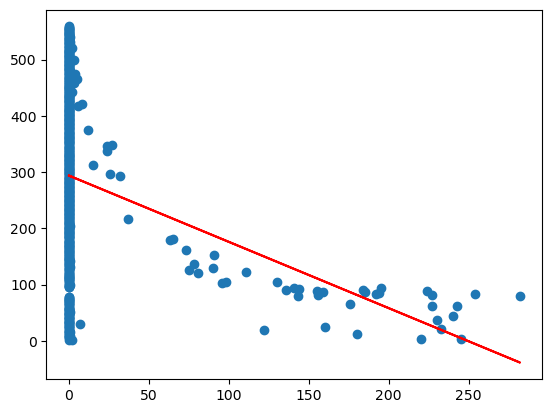

In [33]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [34]:
print(model.coef_)
print(model.intercept_)

[-1.17890833]
293.8115754092807


In [35]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.10428658677920077


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    )

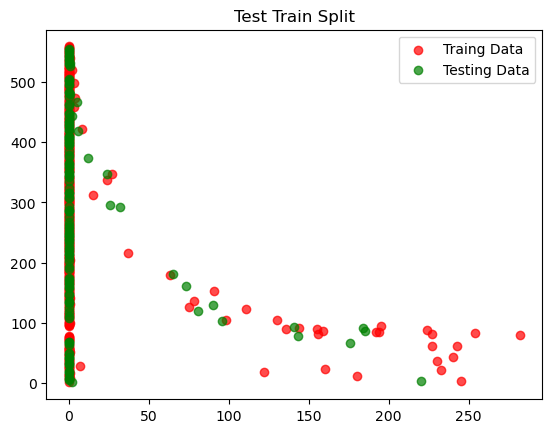

In [37]:
plt.scatter(X_train, y_train, label='Traing Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [38]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'